Let's work a bit more with MLE. Let's take X ~ exp(lambda), EX = 1/lambda. Find its MLE

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar

# exponential parameter
lambda_true = 2.0
# sample size
n = 1000

#np.seterr(divide = 'ignore') 

# Simulate data from Exp(lambda)
data = np.random.exponential(scale=1/lambda_true, size=n)

# Negative log-likelihood function for exponential (since we will use minimize function)
def neg_log_likelihood(lmbda, data):
    L_x =  np.prod(lmbda*np.exp(-lmbda*data))
    #neg_ell = -np.log(L_x) 
    return -L_x #-(n * np.log(lmbda) - lmbda * np.sum(data))
    #the minimization scalar function will just minimize the negative direction of the maximum function and as usual we will find minima
    # Normally it's unstable for large n, see the code below

# Use numerical optimization to find MLE, add bounds
result = minimize_scalar(neg_log_likelihood, bounds=(1e-6, 10), args=(data,))
lambda_mle = result.x

print(f"MLE (numeric optimization): {lambda_mle:.4f}")
print(f"Closed form (1/mean): {n/np.sum(data):.4f}")

MLE (numeric optimization): 2.0492
Closed form (1/mean): 2.0492


Check this: with large n, it returns a wrong result! Why? A direct product of exponential densities is a very small number. Hence, Scipy fails to optimize it and returns the upper bound, 10 in our case. Do this instead: 

In [88]:
def neg_log_likelihood(lmbda, data):
    if lmbda <= 0:
        return np.inf
    # prodcut first
    densities = lmbda * np.exp(-lmbda * data)
    # then apply log
    logL = np.sum(np.log(densities))
    return -logL


# Or compute log-likelihood directly:

#def neg_log_likelihood(lmbda, data):
#   return -(n * np.log(lmbda) - lmbda * np.sum(data))

In [89]:
n = 10000

#np.seterr(divide = 'ignore') 

# Simulate data from Exp(lambda)
data = np.random.exponential(scale=1/lambda_true, size=n)


result = minimize_scalar(neg_log_likelihood, bounds=(1e-6, 10), args=(data,))
lambda_mle = result.x

print(f"MLE (numeric optimization): {lambda_mle:.4f}")
print(f"Closed form (1/mean): {n/np.sum(data):.4f}")

MLE (numeric optimization): 2.0045
Closed form (1/mean): 2.0045


Illustrate the MLE curve

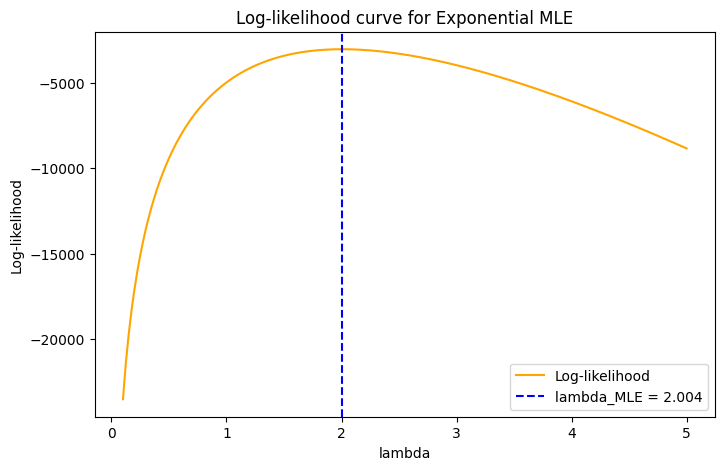

In [94]:
import matplotlib.pyplot as plt

# Evaluate log-likelihood
lambdas = np.linspace(0.1, 5, 200)
log_vals = [-neg_log_likelihood(l, data) for l in lambdas]


# Plot
plt.figure(figsize=(8,5))
plt.plot(lambdas, log_vals, color='orange', label="Log-likelihood")
plt.axvline(lambda_mle, color="blue", linestyle="--", label=f"lambda_MLE = {lambda_mle:.3f}")
plt.title("Log-likelihood curve for Exponential MLE")
plt.xlabel("lambda")
plt.ylabel("Log-likelihood")
plt.legend()
plt.show()

Some examples with exponential distribution and linear regression. We saw that MLE for the expnential density is lambda_hat = n/sum(X). The estimated mean is 1/lambda_hat = sum(X)/n. Let's illustrate this

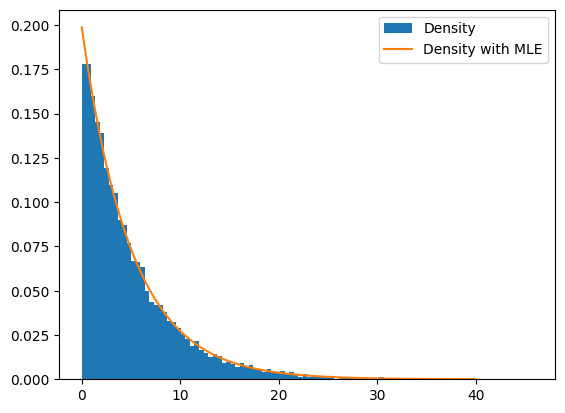

In [96]:

import numpy as np
import matplotlib.pyplot as plt

lam = 5
n = 10000

# generate some exponential random variables
exp_sample = np.random.exponential(scale = 5, size = n)


lam_hat = 1/np.mean(exp_sample)
x_plot = np.linspace(0,40,1000)
plt.hist(exp_sample, bins=100, density=True, label = 'Density')
plt.plot(x_plot, lam_hat*np.exp(-lam_hat*x_plot), label = 'Density with MLE')
plt.legend()
# plot histogram 
#plt.hist(exp_sample, bins=100)
#plt.title('Histogram of data')
#plt.show() 

# plot densities
#plt.hist(exp_sample, bins=100, density=True)
#plt.title('Empirical density of data')
#plt.show() 





Example of practical MLE: Logisitc regression. y_hat = beta_0 + beta_1*X

In [28]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#np.random.seed(0)
n = 10000
x = np.linspace(-3, 3, n)
# true regression coefficient 
beta_true = np.array([0.5, 2.0])  # b_0 intercept, b_1 slope

# logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

p = sigmoid(beta_true[0] + beta_true[1] * x)   # true probabilities
y = np.random.binomial(1, p)                   # Bernoulli outcomes



In [29]:
# negative log-likelihood for logistic regression 
def neg_log_likelihood(beta, x, y):
    # the logistic function
    z = beta[0] + beta[1]*x
    # apply sigmoid transform
    p = sigmoid(z) # -> insert this into log-lik
    # Define Bernoulli log-likelihood: sum( y*log(p) + (1-y)*log(1-p) )
    # add some small number to avoid having zeros
    loglik = np.sum(y*np.log(p + 1e-12) + (1-y)*np.log(1-p + 1e-12)) # this we will minimize
    return -loglik

# Optimize
res = minimize(neg_log_likelihood, x0=np.zeros(2), args=(x,y))
beta_mle = res.x

print("True parameters:", beta_true)
print("Estimated (MLE) parameters:", beta_mle)



True parameters: [0.5 2. ]
Estimated (MLE) parameters: [0.53050654 2.05167604]


In [ ]:
def sigmoid(a):
    return 1/(1+np.exp(-a))
def neg_log_likelihood(beta, x, y):
    z = beta[0] + beta[1]*x
    p = sigmoid(z)
    return -(np.sum(y*np.log(p)+(1-y)*np.log(1-p)))
    

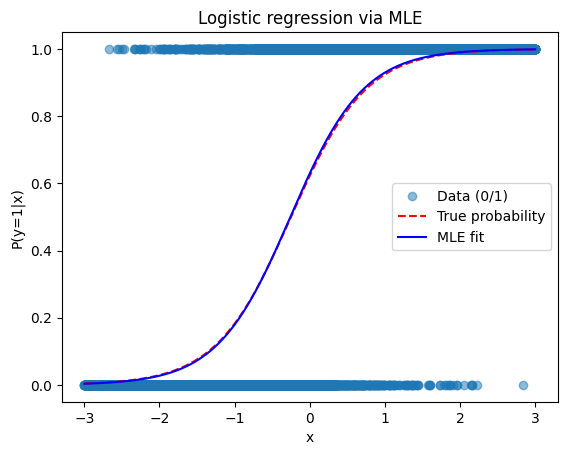

In [30]:

plt.scatter(x, y, alpha=0.5, label="Data (0/1)")
plt.plot(x, p, 'r--', label="True probability")
plt.plot(x, sigmoid(beta_mle[0] + beta_mle[1]*x), 'b-', label="MLE fit")
plt.xlabel("x")
plt.ylabel("P(y=1|x)")
plt.legend()
plt.title("Logistic regression via MLE")
plt.show()